In [2]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/110.0.5481.104"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://www.daft.ie/property-for-rent/ireland"]
for page in range(20,1141,20):
    pages.append("https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=" +str (page))
    
pages

['https://www.daft.ie/property-for-rent/ireland',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=20',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=40',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=60',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=80',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=100',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=120',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=140',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=160',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=180',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=200',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=220',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=240',
 'https://www.daft.ie/property-for-rent/ireland?from=20&pageSize=260',
 'https://www.daft.ie/property-

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"SubUnit__Wrapper-sc-10x486s-0 knvdcE"}):
        links.append("https://www.daft.ie/" + resulthf.get("href"))

links


['https://www.daft.ie//for-rent/apartment-1-bedroom-apartment-spencer-place-spencer-place-dublin-1/4097381',
 'https://www.daft.ie//for-rent/apartment-2-bedroom-apartment-spencer-place-spencer-place-dublin-1/4097384',
 'https://www.daft.ie//for-rent/studio-apartment-1-bedroom-studio-hamilton-gardens-carnlough-road-cabra-dublin-7/4250407',
 'https://www.daft.ie//for-rent/apartment-1-bedroom-scandi-hamilton-gardens-carnlough-road-cabra-dublin-7/3676821',
 'https://www.daft.ie//for-rent/apartment-2-bedroom-scandi-hamilton-gardens-carnlough-road-cabra-dublin-7/3655741',
 'https://www.daft.ie//for-rent/studio-apartment-suite-niche-living-eblana-avenue-dun-laoghaire-co-dublin/4549770',
 'https://www.daft.ie//for-rent/apartment-type-a-rathvoy-park-john-devoy-road-naas-co-kildare/4471254',
 'https://www.daft.ie//for-rent/apartment-type-b-rathvoy-park-john-devoy-road-naas-co-kildare/4471256',
 'https://www.daft.ie//for-rent/apartment-1-bed-castle-view-muirfield-drive-dublin-12-bluebell-dublin-1

In [5]:
len(links)

1297

In [48]:
ex=getAndParseURL("https://www.daft.ie//for-rent/apartment-1-bed-apartment-elmville-harolds-cross-road-harolds-cross-dublin-6w/4279080")

In [56]:
### rent price###
ex.find("h2",{"class":"TitleBlock__StyledCustomHeading-sc-1avkvav-5 blbeVq"}).text.replace("€","").replace(",","").replace(" ","").replace("permonth","")

'2450'

In [70]:
### bathroom number for doublebedroom ones ###
ex.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).find(text=re.compile("Double Bedroom")).findNext().text.replace("Bathroom:","").strip()

AttributeError: 'NoneType' object has no attribute 'findNext'

In [37]:
### Bedroom Number for doublebedroomones###
ex.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).text[0:17].replace("Double Bedroom: ","").strip()

'2'

In [47]:
### General İnfo about flat###
ex.find("h1",{"class":"TitleBlock__Address-sc-1avkvav-8 dzihxK"}).text.strip()

'2 Bedroom Apartment , Castle Walk, Castle Walk, Cherrywood, Co. Dublin'

In [49]:
### General İnfo about flat###
ex.find("h1",{"class":"TitleBlock__Address-sc-1avkvav-8 dzihxK"}).text.strip()

'1 Bed Apartment, Elmville, Harolds Cross Road, Harolds Cross, Dublin 6W'

In [54]:
### Bedroom Number for singlebedroomones ###
ex.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).text[0:17].replace("Single Bedroom: ","").strip()

'1'

In [71]:
### bathroom number for singlebedroom ones ###
ex.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).find(text=re.compile("Single Bedroom")).findNext().text.replace("Bathroom:","").strip()

'1'

In [58]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        ad_info = html.find("h1",{"class":"TitleBlock__Address-sc-1avkvav-8 dzihxK"}).text.strip()
    except:
        ad_info = np.nan
    try:
        rent= html.find("h2",{"class":"TitleBlock__StyledCustomHeading-sc-1avkvav-5 blbeVq"}).text.replace("€","").replace(",","").replace(" ","").replace("permonth","")
    except:
        rent = np.nan
    try:
        single_bedroom = html.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).text[0:17].replace("Single Bedroom: ","").strip()
    except:
        single_bedroom = np.nan
    try:
        double_bedroom = html.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).text[0:17].replace("Double Bedroom: ","").strip()
    except:
        double_bedroom = np.nan
    try:
        bathroom_number1 = html.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).find(text=re.compile("Single Bedroom")).findNext().text.replace("Bathroom:","").strip()
    except:
        bathroom_number1 = np.nan
    try:
        bathroom_number2 = html.find("ul",{"class":"styles__InfoSection-sc-15fxapi-7 ikMOXo"}).find(text=re.compile("Double Bedroom")).findNext().text.replace("Bathroom:","").strip()
    except:
        bathroom_number2 = np.nan
    time.sleep(2)
    
    result.append([ad_info,rent,single_bedroom,double_bedroom,bathroom_number1,bathroom_number2])
    
columns=["Ad_Info","Rent","Single Bedroom","Double Bedroom","Bathroom1","Bathroom2"]
df = pd.DataFrame.from_records(result, columns=columns)

In [69]:
df.head()

,Ad_Info,Rent,Single Bedroom,Double Bedroom,Bathroom1,Bathroom2
0,"1 Bedroom Apartment, Spencer Place, Spencer Pl...",2400.0,Double Bedroom: 1,1,NaN,1
1,"2 Bedroom Apartment, Spencer Place, Spencer Pl...",3000.0,Double Bedroom: 2,2,NaN,2
2,"1 Bedroom Studio, Hamilton Gardens, Carnlough ...",1925.0,Available From: I,Available From: I,NaN,NaN
3,"1 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2175.0,Double Bedroom: 1,1,NaN,1
4,"2 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2450.0,Double Bedroom: 2,2,NaN,2


In [60]:
df.tail()

,Ad_Info,Rent,Single Bedroom,Double Bedroom,Bathroom1,Bathroom2
1292,"Penthouse, Opus, 6 Hanover Quay, Hanover Quay,...",11742,Double Bedroom: 3,3,NaN,3
1293,"1 Bedroom , Shackleton Glebe, Shackleton Glebe...",1875,Double Bedroom: 1,1,NaN,1
1294,"2 Bedroom Apartment, Shackleton Glebe, Shackle...",2250,Double Bedroom: 2,2,NaN,2
1295,"2 Bedroom Apartment , Castle Walk, Castle Walk...",2600,Double Bedroom: 2,2,NaN,2
1296,"2 Bedroom House , Castle Walk, Castle Walk, Ch...",2725,Double Bedroom: 2,2,NaN,2


In [61]:
df.to_csv("ireland_rental.csv")

In [62]:
df.describe()

,Ad_Info,Rent,Single Bedroom,Double Bedroom,Bathroom1,Bathroom2
count,1297,1297,1297,1297,60,1064
unique,65,46,7,7,3,4
top,"2 Bedroom House , Castle Walk, Castle Walk, Ch...",2300,Double Bedroom: 2,2,1,2
freq,57,59,593,593,58,648


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ad_Info         1297 non-null   object 
 1   Rent            1240 non-null   float64
 2   Single Bedroom  1297 non-null   object 
 3   Double Bedroom  1297 non-null   object 
 4   Bathroom1       60 non-null     object 
 5   Bathroom2       1064 non-null   object 
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


In [72]:
df['Rent'] = pd.to_numeric(df['Rent'], errors='coerce')
df["Rent"].mean()

3206.3709677419356

In [3]:
df=pd.read_csv("ireland_rental.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1297 non-null   int64  
 1   Ad_Info         1297 non-null   object 
 2   Rent            1297 non-null   object 
 3   Single Bedroom  1297 non-null   object 
 4   Double Bedroom  1297 non-null   object 
 5   Bathroom1       60 non-null     object 
 6   Bathroom2       1064 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 71.1+ KB


In [17]:
df

,Unnamed: 0,Ad_Info,Rent,Single Bedroom,Double Bedroom,Bathroom1,Bathroom2
0,0,"1 Bedroom Apartment, Spencer Place, Spencer Pl...",2400,Double Bedroom: 1,1,NaN,1.0
1,1,"2 Bedroom Apartment, Spencer Place, Spencer Pl...",3000,Double Bedroom: 2,2,NaN,2.0
2,2,"1 Bedroom Studio, Hamilton Gardens, Carnlough ...",1925,Available From: I,Available From: I,NaN,NaN
3,3,"1 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2175,Double Bedroom: 1,1,NaN,1.0
4,4,"2 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2450,Double Bedroom: 2,2,NaN,2.0
...,...,...,...,...,...,...,...
1292,1292,"Penthouse, Opus, 6 Hanover Quay, Hanover Quay,...",11742,Double Bedroom: 3,3,NaN,3.0
1293,1293,"1 Bedroom , Shackleton Glebe, Shackleton Glebe...",1875,Double Bedroom: 1,1,NaN,1.0
1294,1294,"2 Bedroom Apartment, Shackleton Glebe, Shackle...",2250,Double Bedroom: 2,2,NaN,2.0
1295,1295,"2 Bedroom Apartment , Castle Walk, Castle Walk...",2600,Double Bedroom: 2,2,NaN,2.0


In [4]:
df.drop(columns=["Bathroom1","Single Bedroom"],inplace=True,axis=1)

In [5]:
df

,Unnamed: 0,Ad_Info,Rent,Double Bedroom,Bathroom2
0,0,"1 Bedroom Apartment, Spencer Place, Spencer Pl...",2400,1,1.0
1,1,"2 Bedroom Apartment, Spencer Place, Spencer Pl...",3000,2,2.0
2,2,"1 Bedroom Studio, Hamilton Gardens, Carnlough ...",1925,Available From: I,NaN
3,3,"1 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2175,1,1.0
4,4,"2 Bedroom Scandi, Hamilton Gardens, Carnlough ...",2450,2,2.0
...,...,...,...,...,...
1292,1292,"Penthouse, Opus, 6 Hanover Quay, Hanover Quay,...",11742,3,3.0
1293,1293,"1 Bedroom , Shackleton Glebe, Shackleton Glebe...",1875,1,1.0
1294,1294,"2 Bedroom Apartment, Shackleton Glebe, Shackle...",2250,2,2.0
1295,1295,"2 Bedroom Apartment , Castle Walk, Castle Walk...",2600,2,2.0


In [6]:
df_new=df.set_index('Ad_Info').filter(like='Dublin', axis=0)

In [7]:
df_new

,Unnamed: 0,Rent,Double Bedroom,Bathroom2
Ad_Info,,,,
"1 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",0,2400,1,1.0
"2 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",1,3000,2,2.0
"1 Bedroom Studio, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",2,1925,Available From: I,NaN
"1 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",3,2175,1,1.0
"2 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",4,2450,2,2.0
...,...,...,...,...
"Penthouse, Opus, 6 Hanover Quay, Hanover Quay, Dublin 2",1292,11742,3,3.0
"1 Bedroom , Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",1293,1875,1,1.0
"2 Bedroom Apartment, Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",1294,2250,2,2.0


In [6]:
df_new.columns = df_new.columns.str.strip()

In [8]:
df_new.drop(columns="Unnamed: 0",axis=0,inplace=True)

In [8]:
df_new

,Rent,Double Bedroom,Bathroom2
Ad_Info,,,
"1 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",2400,1,1.0
"2 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",3000,2,2.0
"1 Bedroom Studio, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",1925,Available From: I,NaN
"1 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",2175,1,1.0
"2 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",2450,2,2.0
...,...,...,...
"Penthouse, Opus, 6 Hanover Quay, Hanover Quay, Dublin 2",11742,3,3.0
"1 Bedroom , Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",1875,1,1.0
"2 Bedroom Apartment, Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",2250,2,2.0


In [9]:
df_new["Rent"].unique()

array(['2400', '3000', '1925', '2175', '2450', '1880', '1900', '2300',
       '1975', '2325', '3750', '1875', '2250', '1815', '2065', '2365',
       '2500', '2550', '3200', '3600', '2575', '3400', '2750', '1800',
       '2600', '2445', '2710', '3385', '3550', '2700', '630perweek',
       '2900', '1700', '2149', '3012', '3264', '1950', '3580', '4000',
       '6500', '3458', '11742', '2725'], dtype=object)

In [10]:
df_new['Rent'] = df_new['Rent'].apply(lambda x: '2520' if x == '630perweek' else x)

In [11]:
df_new["Rent"]=df_new["Rent"].astype(float)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 1 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1 to 2 Bedroom House , Castle Walk, Castle Walk, Cherrywood, Co. Dublin
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rent            1181 non-null   float64
 1   Double Bedroom  1181 non-null   object 
 2   Bathroom2       948 non-null    float64
dtypes: float64(2), object(1)
memory usage: 36.9+ KB


In [55]:
df_new["Double Bedroom"].unique()

array(['1', '2', '3'], dtype=object)

In [13]:
df_new.set_index('Double Bedroom').filter(like='Available From: M', axis=0)

,Rent,Bathroom2
Double Bedroom,,
Available From: M,1880.0,NaN
Available From: M,1925.0,NaN


In [14]:
df_new['Double Bedroom'] = df_new['Double Bedroom'].apply(lambda x: '1' if x == 'Single Bedroom: 1' else x)
df_new['Double Bedroom'] = df_new['Double Bedroom'].apply(lambda x: '2' if x == 'Twin Bedroom: 2Ba' else x)
df_new['Double Bedroom'] = df_new['Double Bedroom'].apply(lambda x: '1' if x == 'Available From: I' else x)
df_new['Double Bedroom'] = df_new['Double Bedroom'].apply(lambda x: '1' if x == 'Available From: M' else x)

In [15]:
df_new["Double Bedroom"]=df_new["Double Bedroom"].astype(float)

In [16]:
df_new['Bathroom2'] = df_new['Bathroom2'].fillna(df_new['Double Bedroom'])


In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 1 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1 to 2 Bedroom House , Castle Walk, Castle Walk, Cherrywood, Co. Dublin
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rent      1181 non-null   float64
 1   Bedroom   1181 non-null   float64
 2   Bathroom  1181 non-null   float64
dtypes: float64(3)
memory usage: 36.9+ KB


In [17]:
df_new.rename(columns = {'Double Bedroom':'Bedroom',"Bathroom2":"Bathroom"}, inplace = True)

In [15]:
df_new.columns

Index(['Rent', 'Bedroom', 'Bathroom'], dtype='object')

In [18]:
df_new

,Rent,Bedroom,Bathroom
Ad_Info,,,
"1 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",2400.0,1.0,1.0
"2 Bedroom Apartment, Spencer Place, Spencer Place, Dublin 1",3000.0,2.0,2.0
"1 Bedroom Studio, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",1925.0,1.0,1.0
"1 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",2175.0,1.0,1.0
"2 Bedroom Scandi, Hamilton Gardens, Carnlough Road, Cabra, Dublin 7",2450.0,2.0,2.0
...,...,...,...
"Penthouse, Opus, 6 Hanover Quay, Hanover Quay, Dublin 2",11742.0,3.0,3.0
"1 Bedroom , Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",1875.0,1.0,1.0
"2 Bedroom Apartment, Shackleton Glebe, Shackleton Glebe, Lucan, Co. Dublin",2250.0,2.0,2.0


In [19]:
df_new= df_new.loc[(df_new["Rent"] >= 800) & (df_new["Rent"] <= 10000),:]

In [20]:
df_new["Rent"].mean()

2876.064056939502

In [67]:
df_new["Bedroom"].mean()

1.7976291278577476

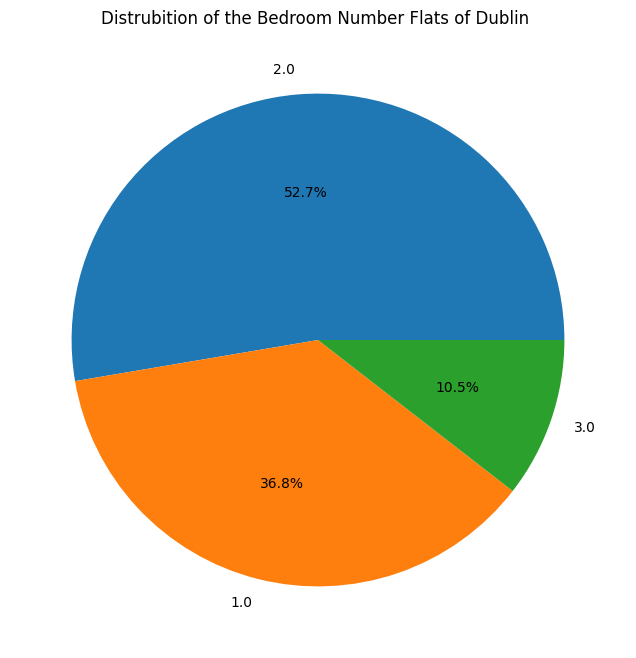

In [21]:
# get the value counts of the 'Bedroom' column
room_counts = df_new['Bedroom'].value_counts()


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Dublin ')

# display the chart
plt.show()


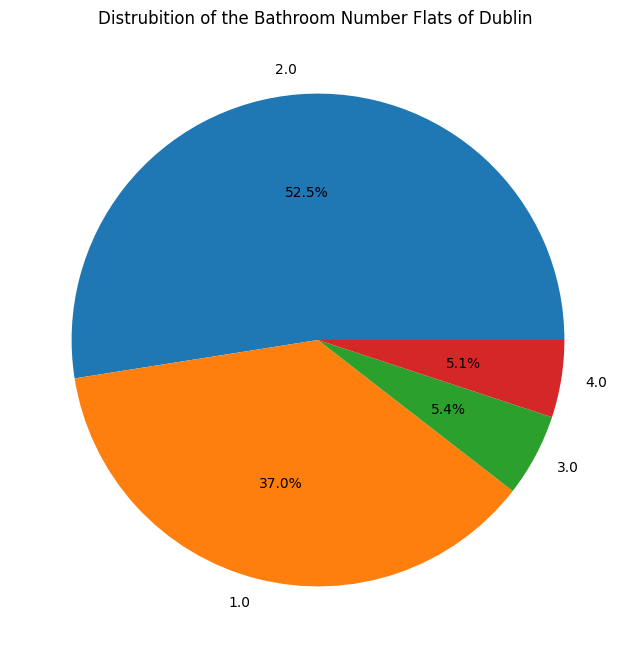

In [22]:
# get the value counts of the 'Bathroom' column
room_counts = df_new['Bathroom'].value_counts()


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bathroom Number Flats of Dublin ')

# display the chart
plt.show()


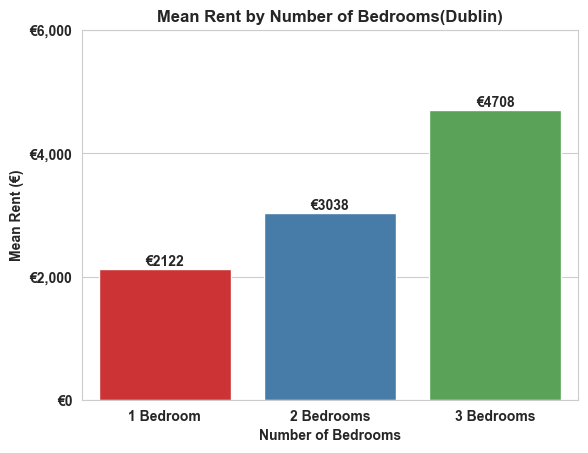

In [52]:
# Calculate mean rent for each group
one_bed_mean_rent = df_new[df_new['Bedroom'] == 1]['Rent'].mean()
two_bed_mean_rent = df_new[df_new['Bedroom'] == 2]['Rent'].mean()
three_bed_mean_rent = df_new[df_new['Bedroom'] == 3]['Rent'].mean()

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 4000, 6000])
ax.set_yticklabels(['€0', '€2,000', '€4,000', '€6,000'], weight='bold')
# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')



# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Dublin)', weight='bold')

plt.show();
